In [11]:
import pandas as pd
!pip install nltk
#tokenize into list
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/grecco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Download POS-tags

In [12]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/grecco/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/grecco/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

### Reading Corpus

In [109]:
filename = 'corpus.txt' 
#open the file
with open(filename, 'r') as f:  #identical with: with open('myfilename.txt', 'r') as file:
    text = f.read() #reads the text from your file line by line
len(text)

4543769

## Tokenizing with  punct removed

In [105]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tokenized_text = tokenizer.tokenize(text)

In [106]:
len(tokenized_text)

772793

### Removing Stop Words - English

In [107]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tokenized_text = [token for token in tokenized_text if token not in stop_words]

In [113]:
len(tokenized_text) #counting token after pre-process

393185

### Great hits

In [111]:

counter = 0
 
for word in tokenized_text: #this is a for loop. You can read it as: for every word in tokenized_text do the following
    #read the below as 'if the word we are currently looking at equals 'great' then do the following'
    if word == 'great': #change here to check for other words 
        counter += 1 #this is the same as writing: counter = counter + 1
print("counting 'great': "+str(counter))

counting 'great': 437


###  Large Hits

In [112]:
counter = 0
 
for word in tokenized_text: #this is a for loop. You can read it as: for every word in tokenized_text do the following
    #read the below as 'if the word we are currently looking at equals 'great' then do the following'
    if word == 'large': #change here to check for other words 
        counter += 1 #this is the same as writing: counter = counter + 1
print("counting 'great': "+str(counter))

counting 'great': 232


In [15]:
#textF = nltk.Text(tokenized_text)

### POS and filter JJ (adjectives)

In [114]:
tokenized_and_pos_tagged = nltk.pos_tag(tokenized_text)


In [117]:
c=0
tokens_adj = []

for item in tokenized_and_pos_tagged:
    word,tag = item
    if not (word.lower() == 'great' and tag not in ['JJ']): ###filter in just ADJECTIVES
        tokens_adj.append(word)
        
print(len(tokens_adj))

393175


In [116]:
tokens_adj[:10]

['Resumption',
 'session',
 'I',
 'declare',
 'resume',
 'session',
 'european',
 'parliament',
 'adjourn',
 'Friday']

### Import Collocations  Bigram and Trigram

In [118]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures,TrigramCollocationFinder,TrigramAssocMeasures


In [120]:


"""bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens_adj)
for i in finder.score_ngrams(bigram_measures.pmi):
    pair, pmi  = i
    if "great" in pair:
        print(i)"""

'bigram_measures = BigramAssocMeasures()\nfinder = BigramCollocationFinder.from_words(tokens_adj)\nfor i in finder.score_ngrams(bigram_measures.pmi):\n    pair, pmi  = i\n    if "great" in pair:\n        print(i)'

###  measuring PMI for Bigram - "great"

In [121]:
finder2 = BigramCollocationFinder.from_words(tokens_adj)
bgm = BigramAssocMeasures()
score2 = bgm.mi_like
great_collocations = {'_'.join(bigram): pmi for bigram, pmi in finder.score_ngrams(score2) if "great" in bigram  and pmi>0.002}

In [122]:
great_collocations

{'great_deal': 7.131368895522683,
 'great_store': 0.06540808543096872,
 'great_interest': 0.03809624314056564,
 'great_expectation': 0.01539013774846323,
 'cause_great': 0.014072005016409195,
 'great_importance': 0.0117144868861116,
 'great_satisfaction': 0.010215756783262505,
 'great_many': 0.010043058684195647,
 'great_stride': 0.009153318077803204,
 'great_significance': 0.00794558860920417,
 'great_majority': 0.007759033579905274,
 'great_Britain': 0.0075273997350355296,
 'great_pleasure': 0.007322654462242563,
 'great_length': 0.006102212051868803,
 'great_effort': 0.005979183583081125,
 'great_care': 0.005955170797606903,
 'great_difficulty': 0.005946189584633521,
 'great_concern': 0.0041326548037842826,
 'make_great': 0.003449357806228876,
 'attach_great': 0.0033284793010193467,
 'great_risk': 0.0031521968882394567,
 'great_Vat': 0.002615233736515201,
 'great_dedication': 0.002615233736515201,
 'great_uncertainty': 0.002471395881006865,
 'great_potential': 0.002403707478414707,


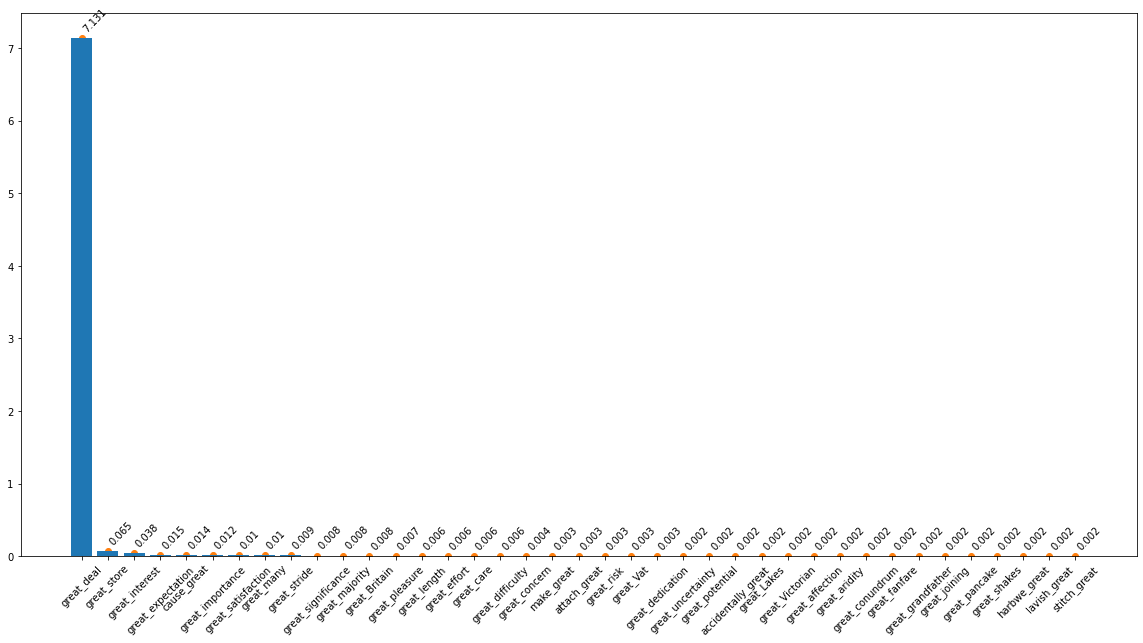

In [124]:
import matplotlib.pyplot as plt

x=great_collocations.keys()
y= great_collocations.values()

plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.scatter(x,y)
for m,n in zip(x,y):
    plt.annotate(round(n,3),(m,n+0.09),rotation=46)
plt.show()

In [125]:
collocations_large = {'_'.join(bigram): pmi for bigram, pmi in finder.score_ngrams(score2) if "large" in bigram }

In [126]:
collocations_large

{'large_scale': 0.5462913074712644,
 'large_number': 0.473184584178499,
 'large_proportion': 0.12315270935960591,
 'large_extent': 0.04780890804597701,
 'large_majority': 0.04404570970328789,
 'large_company': 0.022065649867374006,
 'large_quantity': 0.017380422691879865,
 'large_section': 0.012250453720508167,
 'large_industrial': 0.008289124668435014,
 'large_degree': 0.007588635259834871,
 'Adana_large': 0.004310344827586207,
 'dash_large': 0.004310344827586207,
 'large_colossus': 0.004310344827586207,
 'large_conglomeration': 0.004310344827586207,
 'large_hydrogeological': 0.004310344827586207,
 'large_uninhabited': 0.004310344827586207,
 'plankton_large': 0.004310344827586207,
 'ponderously_large': 0.004310344827586207,
 'depend_large': 0.003940886699507389,
 'dozen_large': 0.0034482758620689655,
 'exceptionally_large': 0.0034482758620689655,
 'directors_large': 0.0021551724137931034,
 'displacement_large': 0.0021551724137931034,
 'large_furnace': 0.0021551724137931034,
 'large_un

###   measuring PMI for Trigram - "great"

In [127]:
finder3 = TrigramCollocationFinder.from_words(tokens_adj)
bgm3 = TrigramAssocMeasures()
score3 = bgm3.mi_like
collocations3 = {'_'.join(trigram): pmi for trigram, pmi in finder3.score_ngrams(score3) if "great" in trigram }

In [128]:
collocations3

{'great_Victorian_statesman': 0.002288329519450801,
 'great_pancake_thick': 0.0011441647597254005,
 'great_stride_tackling': 0.00038138825324180017,
 'fiftieth_anniversary_great': 0.0002542588354945334,
 'stitch_great_fabric': 0.00020802995631370917,
 'meter_viewed_great': 0.00019069412662090009,
 'great_dedication_reconciling': 0.00016345210853220007,
 'set_great_store': 0.00012825114790386024,
 'great_grandfather_fascist': 0.00012043839576056847,
 'abandonment_great_momentum': 9.534706331045004e-05,
 'brenner_motorway_great': 9.534706331045004e-05,
 'Ict_profession_great': 8.475294516484448e-05,
 'stone_signify_great': 8.172605426610003e-05,
 'boycott_Sudan_great': 7.627765064836003e-05,
 'great_Vat_modernisation': 6.538084341288002e-05,
 'great_Britain_Children': 6.0219197880284235e-05,
 'great_fan_voluntary': 5.7208237986270026e-05,
 'great_precision_professionalism': 5.7208237986270026e-05,
 'great_sensitivity_compassion': 5.7208237986270026e-05,
 'anniversary_great_landmark': 5.0

In [129]:
#trigram_measures = TrigramAssocMeasures()
#finder3 = TrigramCollocationFinder.from_words(tokens_adj)
#for i in finder3.score_ngrams(trigram_measures.pmi):
#    pair, pmi  = i
#    if "great" in pair:
#        print(i)

In [130]:
#bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))

In [131]:
#textF_adj = nltk.Text(tokens_adj)
